In [1]:
import seagul.envs
import gym

env = gym.make('su_acro_drake-v0')

import numpy as np
from numpy import pi
import matplotlib.pyplot as plt
import torch

total 0.5179941654205322


Text(0.5, 1.0, 'theta 2 dot ')

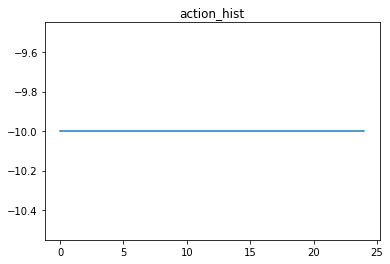

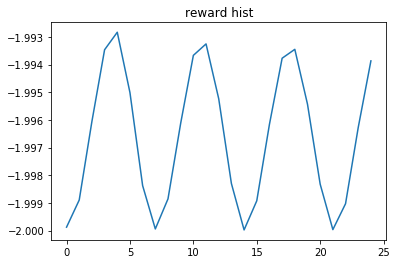

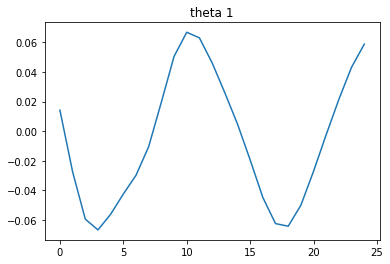

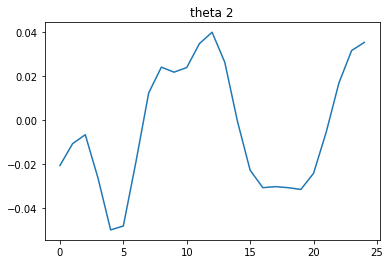

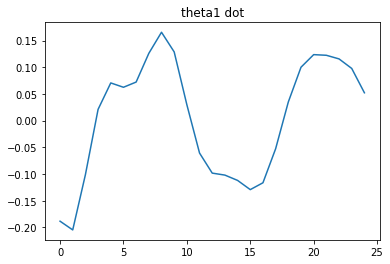

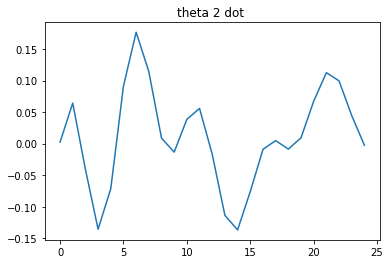

In [2]:
env = gym.make('su_acro_drake-v0')


def control(q):
    k = np.array([[278.44223126, 112.29125985, 119.72457377,  56.82824017]])
    gs = np.array([pi,0,0,0])
    #return 0
    return -k.dot(gs - q)

action_hist = np.zeros((env.num_steps,1))
state_hist = np.zeros((env.num_steps, env.observation_space.shape[0]))
reward_hist = np.zeros((env.num_steps, 1))
obs = env.reset()

import time
start = time.time()
for i in range(env.num_steps):
        actions = control(obs)
        obs, reward, done, _ = env.step(np.asarray(actions))
        action_hist[i,:] = np.copy(np.clip(actions, -10, 10))
        state_hist[i,:] = np.copy(obs)
        reward_hist[i,:] = np.copy(reward)
        if done:
            break
            
print("total", time.time() - start)

plt.plot(action_hist)
plt.title('action_hist')

plt.figure()
plt.plot(reward_hist)
plt.title('reward hist')

plt.figure()
plt.plot(state_hist[:,0])
plt.title("theta 1")

plt.figure()
plt.plot(state_hist[:,1])
plt.title("theta 2")

plt.figure()
plt.plot(state_hist[:,2])
plt.title("theta1 dot")

plt.figure()
plt.plot(state_hist[:,3])
plt.title("theta 2 dot ")